# Naive Bayesian classifiers
Filippo Fantinato 2041620

In this notebook I tried various classifiers on the textual document named [Twenty User Newsgroups](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) available in SciKitLearn library. The classifiers are: DecisionTree, SVM, KNN, MultinomialNB and ComplementNB.

For each fo them I exploited GridSearch to choose the best hyperparameters.

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings("ignore")

Let's fetch the dataset,

In [4]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

see how the text appears

In [5]:
newsgroups_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

and which are the target names.

In [6]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

As suggested in the documentation, we remove headers, footers and quotes elements since it's easy overfitting on some words that can appear there.

In [7]:
to_remove = ('headers', 'footers', 'quotes')

newsgroups_train = fetch_20newsgroups(
    subset='train', 
    remove=to_remove
  )
newsgroups_test = fetch_20newsgroups(
    subset='test', 
    remove=to_remove
  )

Now the data appears like this

In [8]:
newsgroups_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

Let's convert text documents in a matrix of token counts and start by testing the various classifiers.



In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(newsgroups_train.data)

newsgroups_train_vector = vectorizer.transform(newsgroups_train.data)
newsgroups_train_vector.shape

(11314, 101631)

In [14]:
newsgroups_test_vector = vectorizer.transform(newsgroups_test.data)
newsgroups_test_vector.shape

(7532, 101631)

## Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(newsgroups_train_vector, newsgroups_train.target)
dt_score = dt.score(newsgroups_test_vector, newsgroups_test.target)

print("Score:", dt_score)

Score: 0.41755177907594265


## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": range(0, 15)})
knn.fit(newsgroups_train_vector, newsgroups_train.target)
knn_score = knn.score(newsgroups_test_vector, newsgroups_test.target)

print("Best estimator:", knn.best_estimator_)
print("Score:", knn_score)

Best estimator: KNeighborsClassifier(n_neighbors=1)
Score: 0.16848114710568243


## SVM

In [21]:
from sklearn.svm import SVC

svm = GridSearchCV(SVC(), {'kernel': ('linear', 'rbf'), 'C': [1, 3, 5]})
svm.fit(newsgroups_train_vector, newsgroups_train.target)
svm_score = svm.score(newsgroups_test_vector, newsgroups_test.target)

print("Best estimator:", svm.best_estimator_)
print("Score:", svm_score)

Best estimator: SVC(C=1, kernel='linear')
Score: 0.4410515135422199


## Multinomial NB

In [23]:
from sklearn.naive_bayes import MultinomialNB

multinb = GridSearchCV(MultinomialNB(), {"alpha": np.linspace(0, 1, 100)})
multinb.fit(newsgroups_train_vector, newsgroups_train.target)
multinb_score = multinb.score(newsgroups_test_vector, newsgroups_test.target)

print("Best estimator:", multinb.best_estimator_)
print("Score:", multinb_score)

Best estimator: MultinomialNB(alpha=0.010101010101010102)
Score: 0.645910780669145


## Complement NB

In [24]:
from sklearn.naive_bayes import ComplementNB

complementnb = GridSearchCV(ComplementNB(), {"alpha": np.linspace(0, 1, 100)})
complementnb.fit(newsgroups_train_vector, newsgroups_train.target)
complementnb_score = complementnb.score(newsgroups_test_vector, newsgroups_test.target)

print("Best estimator:", complementnb.best_estimator_)
print("Score:", complementnb_score)

Best estimator: ComplementNB(alpha=0.27272727272727276)
Score: 0.6715347849176846


## Conclusions

As you can see from the obatained results, ComplementNB is the best classier among the others, i.e. Decision Tree, KNN, SVM and MultinominalNB.

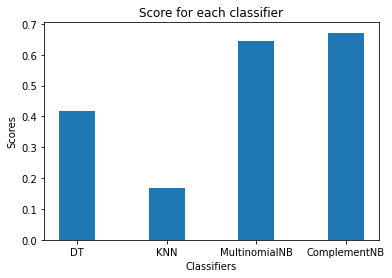

In [26]:
import matplotlib.pyplot as plt
   
data = {
  'DT': dt_score, 
  'KNN': knn_score, 
  'MultinomialNB': multinb_score,
  'ComplementNB': complementnb_score
}
classifiers = list(data.keys())
scores = list(data.values())

plt.bar(classifiers, scores, width = 0.4)

plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.title("Score for each classifier")
plt.show()